In [15]:
# Student Name: Aaron Baggot
# Student Number: C22716399
# Segmentation: Task 1

# Instructions
# 1. Open image "Googly.jpg"
# 2. Use thresholding to separate Googly and his friend from the background
# 3. Use statistical analysis mean, std for a better threshold
# 4. Try multiple thresholds on different channels

# This lab is involves using thresholding to separate Googly and his friend from the background .
# applying statistical analysis mean,std for a better threshold and testing multiple thresholds on different channels.

# [1] moukthika, “Image Thresholding using OpenCV,” OpenCV. Accessed: Oct. 21, 2025. [Online]. Available: https://opencv.org/blog/image-thresholding-using-opencv/


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [17]:
img_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/Googly.jpg")
I = cv2.imread(str(img_path))

if I is None:
    raise Exception(f"Image not found: {img_path}")

# Convert BGR to RGB for display
I_rgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Convert to greyscale
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

T_fix = 120
_, B_fix = cv2.threshold(G, T_fix, 255, cv2.THRESH_BINARY)

# Implement the threshold of T
T = np.mean(G) + np.std(G) # Greyscale version

# Adaptive Thresholding Mean and Gaussian
thresh_mean = cv2.adaptiveThreshold(G, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

thresh_gauss = cv2.adaptiveThreshold(G, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


# Otsu thresholding
_, thresh_otsu = cv2.threshold(G,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# RangeLower = (0, 150, 150)
# RangeUpper = (50, 255, 255)

B_adpt = cv2.adaptiveThreshold(G, maxValue = 255, 
                          adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                          thresholdType = cv2.THRESH_BINARY,
                          blockSize = 5, C = 15 )



/var/folders/nh/gg0k5rzx0cscygqdr507zl780000gn/T/ipykernel_18137/3014790400.py:29: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


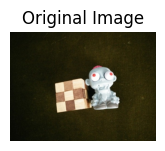

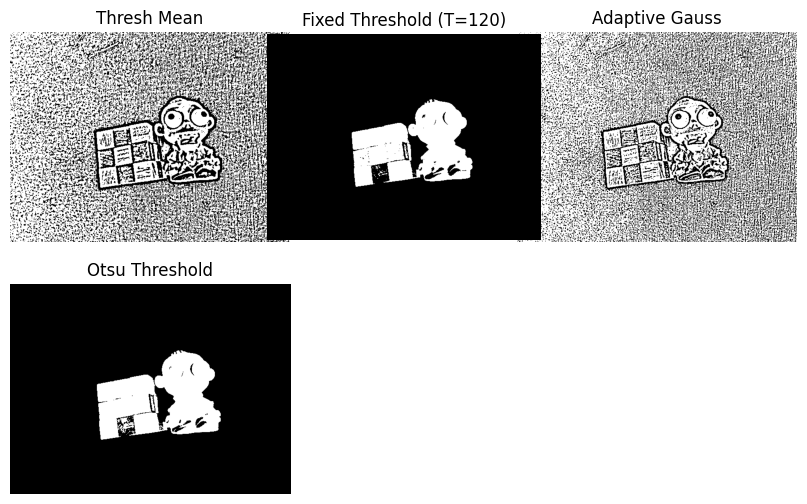

In [18]:
# Display results
plt.subplot(2,3,1)
plt.imshow(I_rgb)
plt.title("Original Image")
plt.axis("off")

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(thresh_mean, cmap='gray')
plt.title("Thresh Mean")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(thresh_gauss, cmap='gray')
plt.title("Adaptive Gauss")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu Threshold")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(B_fix, cmap='gray')
plt.title(f"Fixed Threshold (T={T_fix})")
plt.axis("off")


plt.tight_layout()
plt.show()

In [19]:
''' 

Results of Segmentation Task 1 
Original Image: normal coloured Googly figure.

Thresh Mean: adaptive mean threshold; background detail visible, outlines of Googly clear.

Fixed Threshold: T=120, black-and-white segmentation applying manual threshold.

Adaptive Gauss: smoother edges and better separation in uneven lighting.

Otsu Threshold: automatic global threshold; strong contrast, clean segmentation.

'''

' \n\nResults of Segmentation Task 1 \nOriginal Image – normal coloured Googly figure.\n\nThresh Mean: adaptive mean threshold; background detail visible, outlines of Googly clear.\n\nFixed Threshold: T=120, black-and-white segmentation applying manual threshold.\n\nAdaptive Gauss: smoother edges and better separation in uneven lighting.\n\nOtsu Threshold: automatic global threshold; strong contrast, clean segmentation.\n\n'